In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Importing dataset

In [3]:
hospital_readmissions = pd.read_csv(r"C:\Users\ASUS\Downloads\hospital_readmissions.csv")

In [4]:
hospital_readmissions.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,69,Other,Emergency,Heart Disease,33,2,4,1,1,5,NaN,Yes
1,2,32,Female,Urgent,Diabetes,81,10,4,4,1,6,NaN,No
2,3,78,Female,Urgent,Heart Disease,75,29,4,0,3,5,Normal,No
3,4,38,Male,Elective,Diabetes,77,11,2,3,4,9,NaN,Yes
4,5,41,Female,Urgent,Diabetes,50,25,3,4,1,3,NaN,Yes


In [5]:
#Removing Patient_ID column
hospital_readmissions = hospital_readmissions.drop(columns="Patient_ID", axis=1)

In [6]:
hospital_readmissions['Gender'].unique()

array(['Other', 'Female', 'Male'], dtype=object)

In [7]:
hospital_readmissions['Admission_Type'].unique()

array(['Emergency', 'Urgent', 'Elective'], dtype=object)

In [8]:
hospital_readmissions['Diagnosis'].unique()

array(['Heart Disease', 'Diabetes', 'Injury', 'Infection'], dtype=object)

In [9]:
hospital_readmissions['A1C_Result'].unique()

array([nan, 'Normal', 'Abnormal'], dtype=object)

In [10]:
hospital_readmissions['Readmitted'].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
#Add service_utilization which describes how many times the patient revisit the hospital in a month
hospital_readmissions['service_utilization'] = hospital_readmissions['Num_Outpatient_Visits']+hospital_readmissions['Num_Inpatient_Visits']+hospital_readmissions['Num_Emergency_Visits']

In [12]:
hospital_readmissions

,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted,service_utilization
0,69,Other,Emergency,Heart Disease,33,2,4,1,1,5,NaN,Yes,6
1,32,Female,Urgent,Diabetes,81,10,4,4,1,6,NaN,No,9
2,78,Female,Urgent,Heart Disease,75,29,4,0,3,5,Normal,No,7
3,38,Male,Elective,Diabetes,77,11,2,3,4,9,NaN,Yes,9
4,41,Female,Urgent,Diabetes,50,25,3,4,1,3,NaN,Yes,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,Female,Emergency,Heart Disease,68,10,2,3,2,9,Normal,No,7
996,43,Female,Emergency,Heart Disease,61,7,0,4,0,1,Normal,No,4
997,75,Male,Urgent,Diabetes,29,13,3,1,4,8,Normal,No,8
998,46,Other,Elective,Injury,19,20,1,4,4,1,Abnormal,No,9


In [13]:
hospital_readmissions.duplicated().sum()

0

In [14]:
hospital_readmissions.shape

(1000, 13)

In [15]:
hospital_readmissions.dtypes

Age                       int64
Gender                   object
Admission_Type           object
Diagnosis                object
Num_Lab_Procedures        int64
Num_Medications           int64
Num_Outpatient_Visits     int64
Num_Inpatient_Visits      int64
Num_Emergency_Visits      int64
Num_Diagnoses             int64
A1C_Result               object
Readmitted               object
service_utilization       int64
dtype: object

In [17]:
hospital_readmissions.describe()

,Age,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,service_utilization
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,51.665000,50.836000,15.661000,2.016000,2.019000,1.956000,5.011000,5.991000
std,21.989459,28.075137,8.230177,1.399894,1.416561,1.409983,2.664203,2.429572
min,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,34.000000,27.000000,9.000000,1.000000,1.000000,1.000000,3.000000,4.000000
50%,50.500000,52.000000,16.000000,2.000000,2.000000,2.000000,5.000000,6.000000
75%,69.000000,75.000000,23.000000,3.000000,3.000000,3.000000,7.000000,8.000000
max,150.000000,99.000000,35.000000,4.000000,4.000000,4.000000,9.000000,12.000000


# Handling Missing Values

In [18]:
hospital_readmissions.isnull()

,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted,service_utilization
0,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
hospital_readmissions.isnull().sum()

Age                        0
Gender                     0
Admission_Type             0
Diagnosis                  0
Num_Lab_Procedures         0
Num_Medications            0
Num_Outpatient_Visits      0
Num_Inpatient_Visits       0
Num_Emergency_Visits       0
Num_Diagnoses              0
A1C_Result               434
Readmitted                 0
service_utilization        0
dtype: int64

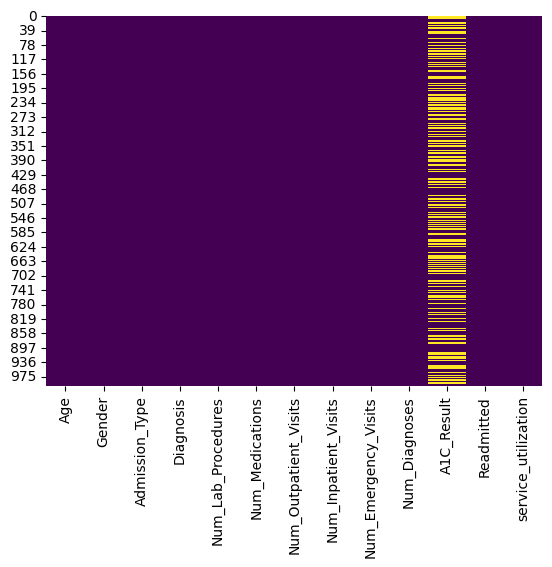

In [20]:
sns.heatmap(hospital_readmissions.isnull(), cbar=False, cmap='viridis')
plt.show()

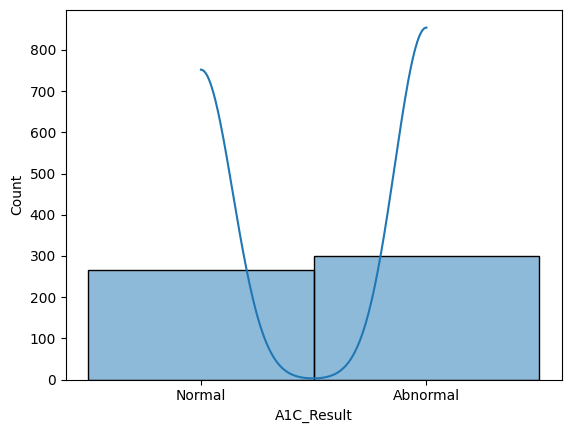

In [21]:
sns.histplot(hospital_readmissions['A1C_Result'], kde=True)
plt.show()

In [22]:
print(hospital_readmissions['A1C_Result'].value_counts())

A1C_Result
Abnormal    301
Normal      265
Name: count, dtype: int64


In [23]:
missing_a1c = hospital_readmissions['A1C_Result'].isnull().sum()
missing_a1c

434

#### we can observe that there are 301 Abnormal, 265 Normal and 434 Nan values in a A1C_Result column. So we should not delete the rows.If we delete the rows we may loss a lot of information about the dataset


# Handling Outliers using boxplot

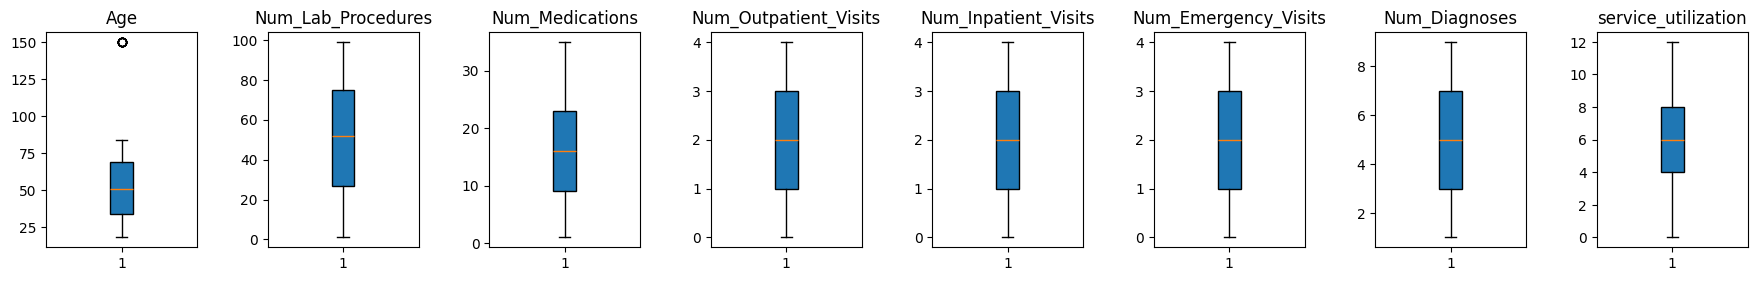

In [24]:
# TO FIND OUTLAYERS 
numeric_cols = hospital_readmissions.select_dtypes(include=[int, float]).columns
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_cols), figsize = (18,3))
fig.tight_layout(pad = 2.0)

for i,column in enumerate(numeric_cols):
    axes[i].boxplot(hospital_readmissions[column], patch_artist=True)
    axes[i].set_title(column)

plt.show()

#### we can observe that column Age is having an outlier. 

In [25]:
#USING IQR METHOD TO REMOVE  OUTLAYERS 
Q1=hospital_readmissions['Age'].quantile(.25)
Q3=hospital_readmissions['Age'].quantile(.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
outlayer=(hospital_readmissions['Age']<lower)|(hospital_readmissions['Age']>upper)
hospital_readmissions[~outlayer]
hospital_data=hospital_readmissions[~outlayer]

In [26]:
hospital_data.describe()

,Age,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,service_utilization
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,50.671717,50.697980,15.719192,2.018182,2.016162,1.946465,4.998990,5.980808
std,19.739924,28.035343,8.222631,1.399723,1.415550,1.405666,2.665929,2.430143
min,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,34.000000,27.000000,9.000000,1.000000,1.000000,1.000000,3.000000,4.000000
50%,50.000000,52.000000,16.000000,2.000000,2.000000,2.000000,5.000000,6.000000
75%,68.000000,74.000000,23.000000,3.000000,3.000000,3.000000,7.000000,8.000000
max,84.000000,99.000000,35.000000,4.000000,4.000000,4.000000,9.000000,12.000000


In [27]:
hospital_data

,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted,service_utilization
0,69,Other,Emergency,Heart Disease,33,2,4,1,1,5,NaN,Yes,6
1,32,Female,Urgent,Diabetes,81,10,4,4,1,6,NaN,No,9
2,78,Female,Urgent,Heart Disease,75,29,4,0,3,5,Normal,No,7
3,38,Male,Elective,Diabetes,77,11,2,3,4,9,NaN,Yes,9
4,41,Female,Urgent,Diabetes,50,25,3,4,1,3,NaN,Yes,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,Female,Emergency,Heart Disease,68,10,2,3,2,9,Normal,No,7
996,43,Female,Emergency,Heart Disease,61,7,0,4,0,1,Normal,No,4
997,75,Male,Urgent,Diabetes,29,13,3,1,4,8,Normal,No,8
998,46,Other,Elective,Injury,19,20,1,4,4,1,Abnormal,No,9


In [28]:
max(hospital_data['Age'])

84

In [30]:
# Function for histogram 
def plot_histograms(hospital_data, cols):

    plt.figure(figsize=(8, 15))

    for i, col in enumerate(cols):
        plt.subplot(7,2, i+1)
        sns.histplot(hospital_data[col],kde= True, bins=30, color="skyblue") 
        plt.title(col)
    plt.tight_layout()
    plt.show()

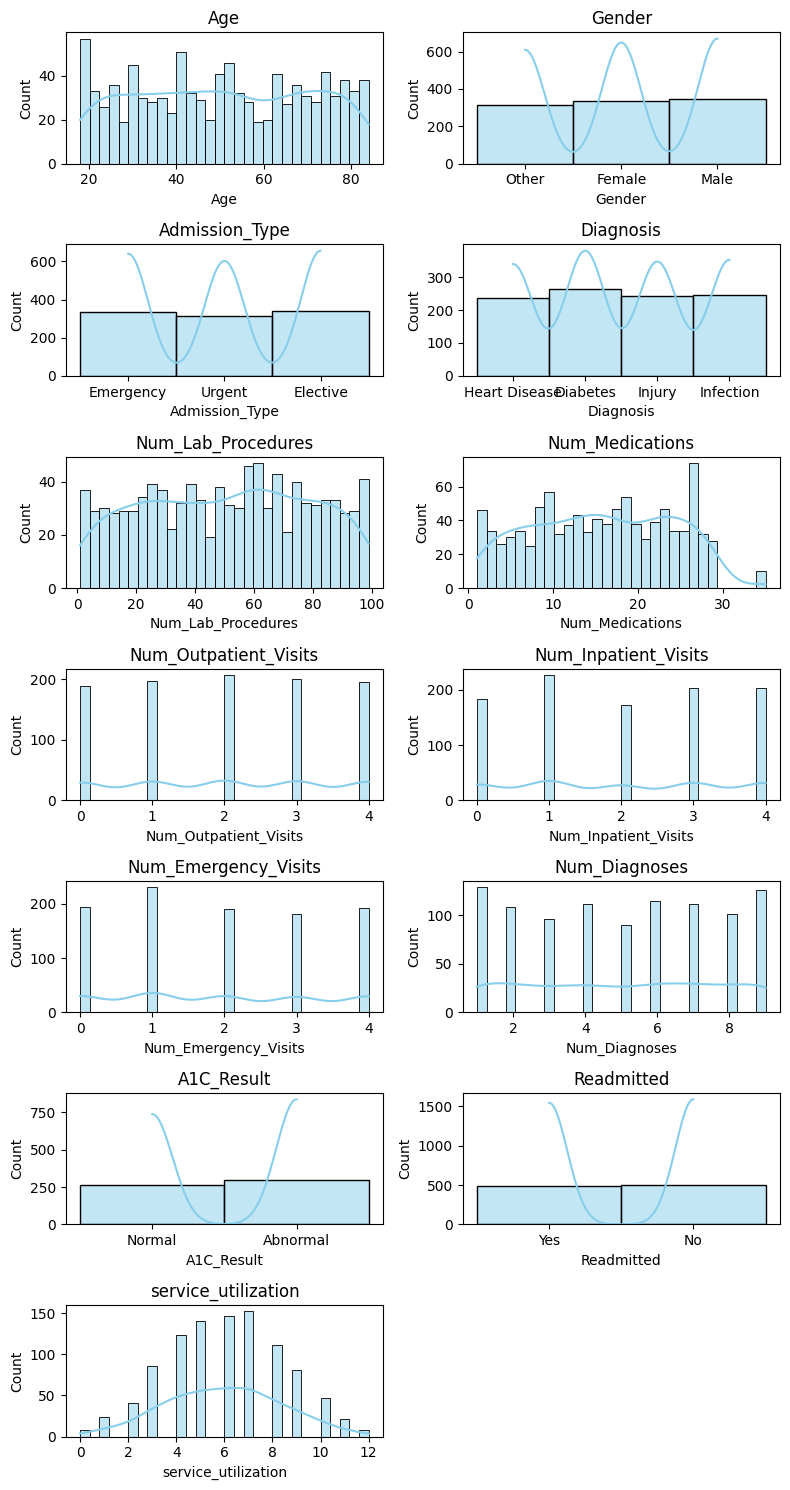

In [31]:
columns = hospital_data.columns
plot_histograms(hospital_data, columns)

In [32]:
print(hospital_data.groupby('A1C_Result')['Age'].mean())

A1C_Result
Abnormal    53.354730
Normal      51.203065
Name: Age, dtype: float64


#### There are some methods to fill the nan values
#### 1.By removing the rows
#### 2.By removing the column 
#### 3.Replacing the nan values with most frequent values
#### 4.Apply classifier algorithms to predict

In [33]:
# 1.Removing the Nan values
known = hospital_data.dropna()

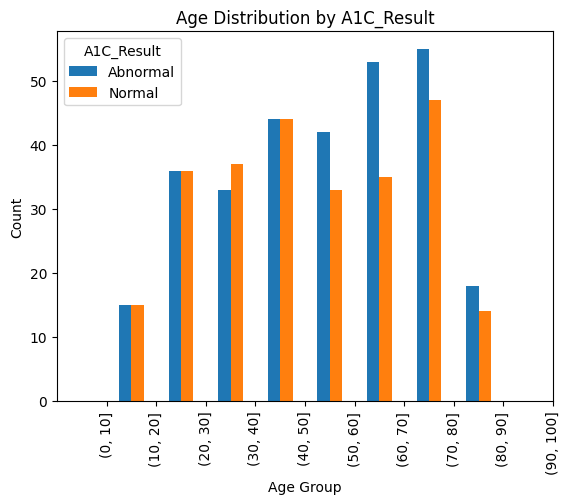

In [34]:

# Create age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Assign age bins to a new column 'Age_Group'
known['Age_Group'] = pd.cut(known['Age'], bins=age_bins)

# Create a DataFrame for plotting
plot_data = known.groupby(['Age_Group', 'A1C_Result']).size().unstack()

# Plot a stacked bar plot with bars side by side
plot_data.plot(kind='bar', stacked=False, position=1.5)
plt.title('Age Distribution by A1C_Result')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [35]:
print(hospital_data.groupby('A1C_Result')['Num_Lab_Procedures'].mean())

A1C_Result
Abnormal    49.885135
Normal      50.524904
Name: Num_Lab_Procedures, dtype: float64


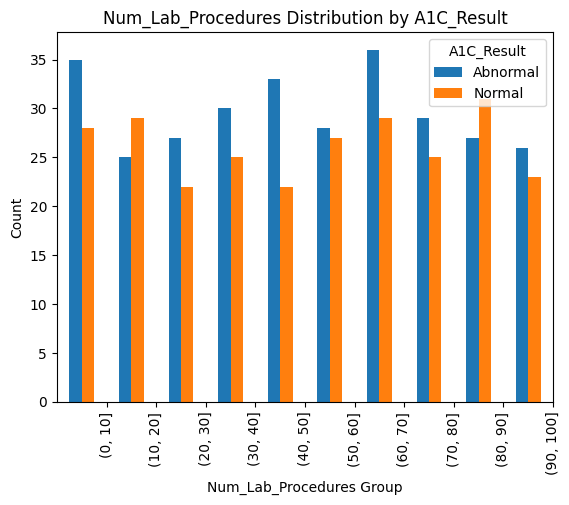

In [36]:
# Create Num_Lab_Procedures bins
Num_Lab_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Assign Num_Lab_Procedures bins to a new column 'Num_Lab_Procedures'
known['Num_Lab_Procedures'] = pd.cut(known['Num_Lab_Procedures'], bins=Num_Lab_bins)

# Create a DataFrame for plotting
plot_data = known.groupby(['Num_Lab_Procedures', 'A1C_Result']).size().unstack()

# Plot a stacked bar plot with bars side by side
plot_data.plot(kind='bar', stacked=False, position=1.5)
plt.title('Num_Lab_Procedures Distribution by A1C_Result')
plt.xlabel('Num_Lab_Procedures Group')
plt.ylabel('Count')
plt.show()

In [37]:
print(hospital_data.groupby('A1C_Result')['Num_Medications'].mean())

A1C_Result
Abnormal    15.594595
Normal      15.892720
Name: Num_Medications, dtype: float64


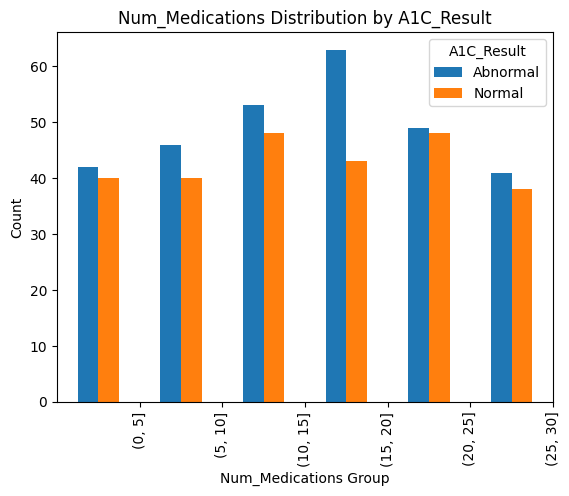

In [38]:
# Create Num_Medications bins
Num_Medications_bins = [0,5,10,15,20,25,30]

# Assign Num_Medications bins to a new column 'Num_Medications'
known['Num_Medications'] = pd.cut(known['Num_Medications'], bins=Num_Medications_bins)

# Create a DataFrame for plotting
plot_data = known.groupby(['Num_Medications', 'A1C_Result']).size().unstack()

# Plot a stacked bar plot with bars side by side
plot_data.plot(kind='bar', stacked=False, position=1.5)
plt.title('Num_Medications Distribution by A1C_Result')
plt.xlabel('Num_Medications Group')
plt.ylabel('Count')
plt.show()

In [39]:
print(hospital_data.groupby('A1C_Result')['service_utilization'].mean())

A1C_Result
Abnormal    5.976351
Normal      5.789272
Name: service_utilization, dtype: float64


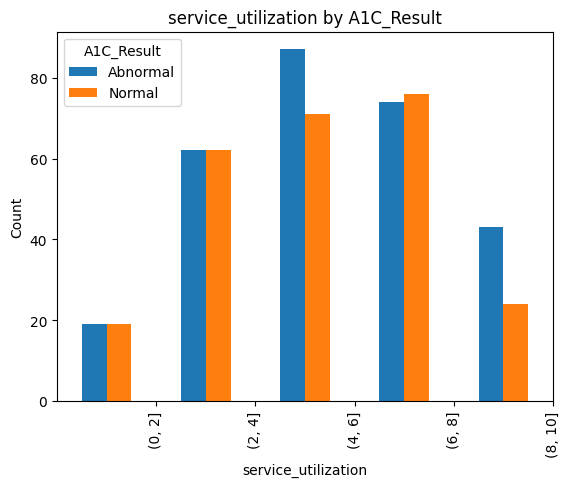

In [40]:
# Create service_utilization bins bins
service_utilization_bins = [0,2,4,6,8,10]

# Assign=service utilization bins to a new column 'serrvice_utilization'
known['service_utilization'] = pd.cut(known['service_utilization'], bins=service_utilization_bins)

# Create a DataFrame for plotting
plot_data = known.groupby(['service_utilization', 'A1C_Result']).size().unstack()

# Plot a stacked bar plot with bars side by side
plot_data.plot(kind='bar', stacked=False, position=1.5)
plt.title('service_utilization by A1C_Result')
plt.xlabel('service_utilization')
plt.ylabel('Count')
plt.show()

In [41]:
# 2.By romving the column
data = hospital_data.drop(columns=['A1C_Result'])

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    990 non-null    int64 
 1   Gender                 990 non-null    object
 2   Admission_Type         990 non-null    object
 3   Diagnosis              990 non-null    object
 4   Num_Lab_Procedures     990 non-null    int64 
 5   Num_Medications        990 non-null    int64 
 6   Num_Outpatient_Visits  990 non-null    int64 
 7   Num_Inpatient_Visits   990 non-null    int64 
 8   Num_Emergency_Visits   990 non-null    int64 
 9   Num_Diagnoses          990 non-null    int64 
 10  Readmitted             990 non-null    object
 11  service_utilization    990 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 100.5+ KB


In [43]:
data.isnull().sum()

Age                      0
Gender                   0
Admission_Type           0
Diagnosis                0
Num_Lab_Procedures       0
Num_Medications          0
Num_Outpatient_Visits    0
Num_Inpatient_Visits     0
Num_Emergency_Visits     0
Num_Diagnoses            0
Readmitted               0
service_utilization      0
dtype: int64

In [44]:
# Seperating categorical values 
# Label encoding on Gender, Admission_type, Diagnosis
# One-hot encoding on Readmitted


In [45]:
#SEPERATING CATEGORICAL VALUES 
cat = data.select_dtypes(include='object')
col=cat.drop(columns=['Readmitted'],axis=1)
target = cat['Readmitted']
test = cat.drop(columns='Readmitted', axis=1)
columns = test.columns

for i in columns:
    test = pd.get_dummies(test, columns=[i], prefix=f'Category_{i}')

test

,Category_Gender_Female,Category_Gender_Male,Category_Gender_Other,Category_Admission_Type_Elective,Category_Admission_Type_Emergency,Category_Admission_Type_Urgent,Category_Diagnosis_Diabetes,Category_Diagnosis_Heart Disease,Category_Diagnosis_Infection,Category_Diagnosis_Injury
0,False,False,True,False,True,False,False,True,False,False
1,True,False,False,False,False,True,True,False,False,False
2,True,False,False,False,False,True,False,True,False,False
3,False,True,False,True,False,False,True,False,False,False
4,True,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,True,False,False,False,True,False,False,True,False,False
996,True,False,False,False,True,False,False,True,False,False
997,False,True,False,False,False,True,True,False,False,False
998,False,False,True,True,False,False,False,False,False,True


In [46]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cat['Readmitted']=le.fit_transform(cat['Readmitted'])
target = cat['Readmitted']

In [47]:
Total_data = pd.concat([test,target],axis=1)
Total_data

,Category_Gender_Female,Category_Gender_Male,Category_Gender_Other,Category_Admission_Type_Elective,Category_Admission_Type_Emergency,Category_Admission_Type_Urgent,Category_Diagnosis_Diabetes,Category_Diagnosis_Heart Disease,Category_Diagnosis_Infection,Category_Diagnosis_Injury,Readmitted
0,False,False,True,False,True,False,False,True,False,False,1
1,True,False,False,False,False,True,True,False,False,False,0
2,True,False,False,False,False,True,False,True,False,False,0
3,False,True,False,True,False,False,True,False,False,False,1
4,True,False,False,False,False,True,True,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...
995,True,False,False,False,True,False,False,True,False,False,0
996,True,False,False,False,True,False,False,True,False,False,0
997,False,True,False,False,False,True,True,False,False,False,0
998,False,False,True,True,False,False,False,False,False,True,0


In [48]:
A1C = hospital_data['A1C_Result']
T_Data = pd.concat([Total_data, A1C], axis=1)
T_Data

,Category_Gender_Female,Category_Gender_Male,Category_Gender_Other,Category_Admission_Type_Elective,Category_Admission_Type_Emergency,Category_Admission_Type_Urgent,Category_Diagnosis_Diabetes,Category_Diagnosis_Heart Disease,Category_Diagnosis_Infection,Category_Diagnosis_Injury,Readmitted,A1C_Result
0,False,False,True,False,True,False,False,True,False,False,1,NaN
1,True,False,False,False,False,True,True,False,False,False,0,NaN
2,True,False,False,False,False,True,False,True,False,False,0,Normal
3,False,True,False,True,False,False,True,False,False,False,1,NaN
4,True,False,False,False,False,True,True,False,False,False,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,True,False,False,False,True,False,False,True,False,False,0,Normal
996,True,False,False,False,True,False,False,True,False,False,0,Normal
997,False,True,False,False,False,True,True,False,False,False,0,Normal
998,False,False,True,True,False,False,False,False,False,True,0,Abnormal


In [49]:
Num = hospital_data.select_dtypes(include=[int,float])
Total_Data = pd.concat([T_Data,Num],axis=1)
Total_Data

,Category_Gender_Female,Category_Gender_Male,Category_Gender_Other,Category_Admission_Type_Elective,Category_Admission_Type_Emergency,Category_Admission_Type_Urgent,Category_Diagnosis_Diabetes,Category_Diagnosis_Heart Disease,Category_Diagnosis_Infection,Category_Diagnosis_Injury,Readmitted,A1C_Result,Age,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,service_utilization
0,False,False,True,False,True,False,False,True,False,False,1,NaN,69,33,2,4,1,1,5,6
1,True,False,False,False,False,True,True,False,False,False,0,NaN,32,81,10,4,4,1,6,9
2,True,False,False,False,False,True,False,True,False,False,0,Normal,78,75,29,4,0,3,5,7
3,False,True,False,True,False,False,True,False,False,False,1,NaN,38,77,11,2,3,4,9,9
4,True,False,False,False,False,True,True,False,False,False,1,NaN,41,50,25,3,4,1,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,True,False,False,False,True,False,False,True,False,False,0,Normal,21,68,10,2,3,2,9,7
996,True,False,False,False,True,False,False,True,False,False,0,Normal,43,61,7,0,4,0,1,4
997,False,True,False,False,False,True,True,False,False,False,0,Normal,75,29,13,3,1,4,8,8
998,False,False,True,True,False,False,False,False,False,True,0,Abnormal,46,19,20,1,4,4,1,9


In [83]:
Complete_data = Total_Data.dropna()
Complete_data

,Category_Gender_Female,Category_Gender_Male,Category_Gender_Other,Category_Admission_Type_Elective,Category_Admission_Type_Emergency,Category_Admission_Type_Urgent,Category_Diagnosis_Diabetes,Category_Diagnosis_Heart Disease,Category_Diagnosis_Infection,Category_Diagnosis_Injury,Readmitted,A1C_Result,Age,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,service_utilization
2,True,False,False,False,False,True,False,True,False,False,0,1.0,78,75,29,4,0,3,5,7
7,True,False,False,True,False,False,False,True,False,False,1,1.0,70,28,19,4,0,3,7,7
8,False,True,False,False,False,True,False,False,True,False,0,1.0,19,70,23,1,2,4,6,7
9,False,True,False,False,True,False,False,False,False,True,0,0.0,47,41,24,4,0,0,3,4
11,True,False,False,False,True,False,False,False,False,True,0,0.0,19,68,14,2,4,2,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,True,False,False,False,True,False,False,True,False,False,0,1.0,21,68,10,2,3,2,9,7
996,True,False,False,False,True,False,False,True,False,False,0,1.0,43,61,7,0,4,0,1,4
997,False,True,False,False,False,True,True,False,False,False,0,1.0,75,29,13,3,1,4,8,8
998,False,False,True,True,False,False,False,False,False,True,0,0.0,46,19,20,1,4,4,1,9


In [51]:
Complete_data['A1C_Result']=le.fit_transform(Complete_data['A1C_Result'])


In [52]:
Complete_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 557 entries, 2 to 999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Category_Gender_Female             557 non-null    bool 
 1   Category_Gender_Male               557 non-null    bool 
 2   Category_Gender_Other              557 non-null    bool 
 3   Category_Admission_Type_Elective   557 non-null    bool 
 4   Category_Admission_Type_Emergency  557 non-null    bool 
 5   Category_Admission_Type_Urgent     557 non-null    bool 
 6   Category_Diagnosis_Diabetes        557 non-null    bool 
 7   Category_Diagnosis_Heart Disease   557 non-null    bool 
 8   Category_Diagnosis_Infection       557 non-null    bool 
 9   Category_Diagnosis_Injury          557 non-null    bool 
 10  Readmitted                         557 non-null    int32
 11  A1C_Result                         557 non-null    int32
 12  Age                        

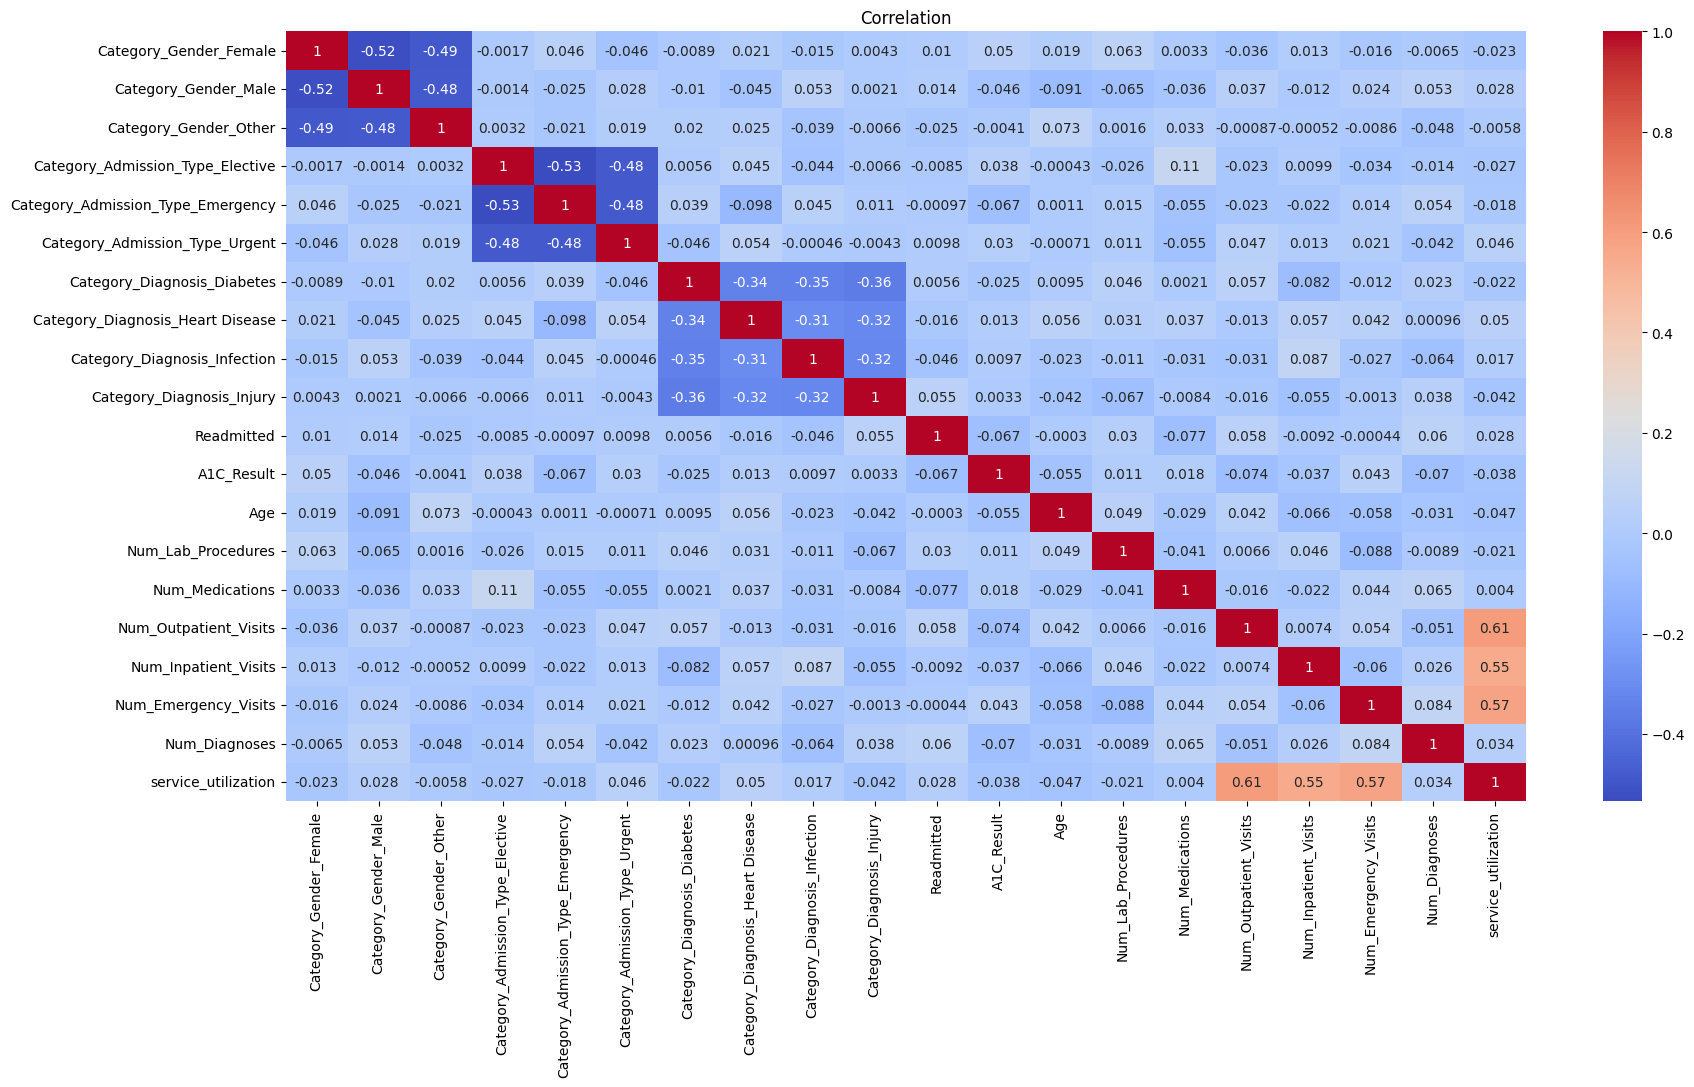

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Complete_data' is your DataFrame
correlation = Complete_data.corr()

# Create a figure with a specific size
plt.figure(figsize=(20,10))

# Create a heatmap
sns.heatmap(correlation, cmap='coolwarm', annot=True)

# Set the title
plt.title('Correlation')

# Show the plot
plt.show()

In [54]:
# Extract the target variable
target_variable = Complete_data['A1C_Result']

# Calculate the correlation between the target variable and other columns
correlations = Complete_data.drop(columns=['A1C_Result']).corrwith(target_variable)

# Display the correlations in descending order
sorted_correlations = correlations.abs().sort_values(ascending=False)
print("Correlations with A1C_Result:")
print(sorted_correlations)

Correlations with A1C_Result:
Num_Outpatient_Visits                0.073522
Num_Diagnoses                        0.069942
Category_Admission_Type_Emergency    0.067245
Readmitted                           0.067127
Age                                  0.054548
Category_Gender_Female               0.049626
Category_Gender_Male                 0.045765
Num_Emergency_Visits                 0.043077
Category_Admission_Type_Elective     0.038476
service_utilization                  0.038452
Num_Inpatient_Visits                 0.036542
Category_Admission_Type_Urgent       0.029814
Category_Diagnosis_Diabetes          0.024828
Num_Medications                      0.017884
Category_Diagnosis_Heart Disease     0.013244
Num_Lab_Procedures                   0.011182
Category_Diagnosis_Infection         0.009706
Category_Gender_Other                0.004139
Category_Diagnosis_Injury            0.003306
dtype: float64


In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
scaler=MinMaxScaler()
Complete_data['Age'] = scaler.fit_transform(Complete_data[['Age']])
Complete_data['Age']

2      0.909091
7      0.787879
8      0.015152
9      0.439394
11     0.015152
         ...   
995    0.045455
996    0.378788
997    0.863636
998    0.424242
999    0.545455
Name: Age, Length: 557, dtype: float64

In [57]:
scaler=MinMaxScaler()
Complete_data['service_utilization'] = scaler.fit_transform(Complete_data[['service_utilization']])
Complete_data['service_utilization']

2      0.583333
7      0.583333
8      0.583333
9      0.333333
11     0.666667
         ...   
995    0.583333
996    0.333333
997    0.666667
998    0.750000
999    0.500000
Name: service_utilization, Length: 557, dtype: float64

In [58]:
scaler=MinMaxScaler()
Complete_data['Num_Medications'] = scaler.fit_transform(Complete_data[['Num_Medications']])
Complete_data['Num_Medications']

2      0.823529
7      0.529412
8      0.647059
9      0.676471
11     0.382353
         ...   
995    0.264706
996    0.176471
997    0.352941
998    0.558824
999    0.794118
Name: Num_Medications, Length: 557, dtype: float64

In [59]:
scaler=MinMaxScaler()
Complete_data['Num_Lab_Procedures'] = scaler.fit_transform(Complete_data[['Num_Lab_Procedures']])
Complete_data['Num_Lab_Procedures']

2      0.755102
7      0.275510
8      0.704082
9      0.408163
11     0.683673
         ...   
995    0.683673
996    0.612245
997    0.285714
998    0.183673
999    0.428571
Name: Num_Lab_Procedures, Length: 557, dtype: float64

In [60]:
scaler=MinMaxScaler()
Complete_data['Num_Diagnoses'] = scaler.fit_transform(Complete_data[['Num_Diagnoses']])
Complete_data['Num_Diagnoses']

2      0.500
7      0.750
8      0.625
9      0.250
11     0.500
       ...  
995    1.000
996    0.000
997    0.875
998    0.000
999    0.875
Name: Num_Diagnoses, Length: 557, dtype: float64

In [ ]:
# Training the dataset

In [61]:
x=Complete_data.drop(columns=['A1C_Result','Category_Admission_Type_Urgent','Num_Inpatient_Visits','Age','Category_Admission_Type_Elective','Category_Diagnosis_Diabetes','Category_Admission_Type_Emergency','Num_Emergency_Visits','service_utilization'],axis=1)
y=Complete_data['A1C_Result']

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [65]:
# x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.1,random_state=0),58

x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.1, random_state=72)
model = LogisticRegression(random_state=58)
model.fit(x_train1, y_train1)
y_pred1 = model.predict(x_test1)

accuracy1 = accuracy_score(y_test1, y_pred1)
classification_rep1=classification_report(y_test1, y_pred1)


print(" Accuracy in LOG_REG:", accuracy1)
print(f'Classification Report:\n{classification_rep1}')

 Accuracy in LOG_REG: 0.5357142857142857
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.54      0.62        39
           1       0.33      0.53      0.41        17

    accuracy                           0.54        56
   macro avg       0.53      0.53      0.51        56
weighted avg       0.61      0.54      0.55        56



In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
# # Decesion tree classification
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.1, random_state=72)
model2 = DecisionTreeClassifier(random_state=72)
model2.fit(x_train2, y_train2)
y_pred2 = model2.predict(x_test2)

accuracy2 = accuracy_score(y_test2, y_pred2)
classification_rep2=classification_report(y_test2, y_pred2)


print("Accuracy in DEC_TREE:", accuracy2)
print(f'Classification Report:\n{classification_rep2}')

Accuracy in DEC_TREE: 0.6428571428571429
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74        39
           1       0.42      0.47      0.44        17

    accuracy                           0.64        56
   macro avg       0.59      0.59      0.59        56
weighted avg       0.65      0.64      0.65        56



In [68]:
from sklearn.svm import SVC

In [69]:
x_train3,x_test3,y_train3,y_test3=train_test_split(x,y, test_size=0.1,random_state=72)
model3=SVC(random_state=72)
model3.fit(x_train3,y_train3)
y_pred3=model3.predict(x_test3)

accuracy3=accuracy_score(y_test3,y_pred3)
classification_rep3=classification_report(y_test3,y_pred3)

print("Accuracy in SVM:", accuracy3)
print(f'Classification Report:\n{classification_rep3}')


# x_train3,x_test3,y_train3,y_test3=train_test_split(x,y, test_size=0.1,random_state=26)
# model3=SVC(random_state=26)
# model3.fit(x_train3,y_train3)
# y_pred3=model3.predict(x_test3)
# accuracy3=accuracy_score(y_test3,y_pred3)
# print(accuracy3)

Accuracy in SVM: 0.5535714285714286
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.62      0.66        39
           1       0.32      0.41      0.36        17

    accuracy                           0.55        56
   macro avg       0.51      0.51      0.51        56
weighted avg       0.59      0.55      0.57        56



In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
x_train4,x_test4,y_train4,y_test4=train_test_split(x,y, test_size=0.1,random_state=72)
model4=RandomForestClassifier(random_state=72)
model4.fit(x_train4,y_train4)
y_pred4=model4.predict(x_test4)

accuracy4=accuracy_score(y_test4,y_pred4)
classification_rep4=classification_report(y_test4,y_pred4)

print("Accuracy in RF:", accuracy4)
print(f'Classification Report:\n{classification_rep4}')

Accuracy in RF: 0.5535714285714286
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.62      0.66        39
           1       0.32      0.41      0.36        17

    accuracy                           0.55        56
   macro avg       0.51      0.51      0.51        56
weighted avg       0.59      0.55      0.57        56



In [84]:
#Back to complete-data
Complete_data

,Category_Gender_Female,Category_Gender_Male,Category_Gender_Other,Category_Admission_Type_Elective,Category_Admission_Type_Emergency,Category_Admission_Type_Urgent,Category_Diagnosis_Diabetes,Category_Diagnosis_Heart Disease,Category_Diagnosis_Infection,Category_Diagnosis_Injury,Readmitted,A1C_Result,Age,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,service_utilization
2,True,False,False,False,False,True,False,True,False,False,0,1.0,78,75,29,4,0,3,5,7
7,True,False,False,True,False,False,False,True,False,False,1,1.0,70,28,19,4,0,3,7,7
8,False,True,False,False,False,True,False,False,True,False,0,1.0,19,70,23,1,2,4,6,7
9,False,True,False,False,True,False,False,False,False,True,0,0.0,47,41,24,4,0,0,3,4
11,True,False,False,False,True,False,False,False,False,True,0,0.0,19,68,14,2,4,2,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,True,False,False,False,True,False,False,True,False,False,0,1.0,21,68,10,2,3,2,9,7
996,True,False,False,False,True,False,False,True,False,False,0,1.0,43,61,7,0,4,0,1,4
997,False,True,False,False,False,True,True,False,False,False,0,1.0,75,29,13,3,1,4,8,8
998,False,False,True,True,False,False,False,False,False,True,0,0.0,46,19,20,1,4,4,1,9


In [85]:
datab = Total_Data[Total_Data['A1C_Result'].isnull()]
datab= datab.drop(columns=['A1C_Result','Category_Admission_Type_Urgent','service_utilization',
                              'Num_Inpatient_Visits','Age','Category_Admission_Type_Elective','Category_Diagnosis_Diabetes',
                              'Category_Admission_Type_Emergency','Num_Emergency_Visits'],axis=1)
datab

,Category_Gender_Female,Category_Gender_Male,Category_Gender_Other,Category_Diagnosis_Heart Disease,Category_Diagnosis_Infection,Category_Diagnosis_Injury,Readmitted,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Diagnoses
0,False,False,True,True,False,False,1,33,2,4,5
1,True,False,False,False,False,False,0,81,10,4,6
3,False,True,False,False,False,False,1,77,11,2,9
4,True,False,False,False,False,False,1,50,25,3,3
5,False,True,False,False,False,True,0,11,20,3,3
...,...,...,...,...,...,...,...,...,...,...,...
990,False,False,True,True,False,False,1,69,12,1,6
991,False,False,True,False,False,False,0,85,5,1,9
992,False,True,False,False,True,False,0,10,23,0,1
993,True,False,False,True,False,False,1,83,16,0,5


In [86]:
data_Not_null = Total_Data[Total_Data['A1C_Result'].notnull()]
data_Not_null

,Category_Gender_Female,Category_Gender_Male,Category_Gender_Other,Category_Admission_Type_Elective,Category_Admission_Type_Emergency,Category_Admission_Type_Urgent,Category_Diagnosis_Diabetes,Category_Diagnosis_Heart Disease,Category_Diagnosis_Infection,Category_Diagnosis_Injury,Readmitted,A1C_Result,Age,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,service_utilization
2,True,False,False,False,False,True,False,True,False,False,0,1.0,78,75,29,4,0,3,5,7
7,True,False,False,True,False,False,False,True,False,False,1,1.0,70,28,19,4,0,3,7,7
8,False,True,False,False,False,True,False,False,True,False,0,1.0,19,70,23,1,2,4,6,7
9,False,True,False,False,True,False,False,False,False,True,0,0.0,47,41,24,4,0,0,3,4
11,True,False,False,False,True,False,False,False,False,True,0,0.0,19,68,14,2,4,2,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,True,False,False,False,True,False,False,True,False,False,0,1.0,21,68,10,2,3,2,9,7
996,True,False,False,False,True,False,False,True,False,False,0,1.0,43,61,7,0,4,0,1,4
997,False,True,False,False,False,True,True,False,False,False,0,1.0,75,29,13,3,1,4,8,8
998,False,False,True,True,False,False,False,False,False,True,0,0.0,46,19,20,1,4,4,1,9


In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
# Assuming x and y are your feature matrix and target variable 
# Inner loop for k values
for k_value5 in range(1, 21):  # Try k values from 1 to 20
        x_train5, x_test5, y_train5, y_test5 = train_test_split(x, y, test_size=0.1, random_state=72)

        # Initialize and train the model
        model5 = KNeighborsClassifier(n_neighbors=15)
        model5.fit(x_train5, y_train5)

        # Make predictions on the test set
        y_pred5 = model5.predict(x_test5)
        missing_val=model5.predict(datab) #b=features directly from data frame

        # Calculate accuracy
        accuracy5 = accuracy_score(y_test5, y_pred5)
        classification_rep5=classification_report(y_test5, y_pred5)



print(f" Accuracy for KNN: {accuracy5}")
print(f'Classification Report:\n{classification_rep5}')

 Accuracy for KNN: 0.5892857142857143
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.64      0.68        39
           1       0.36      0.47      0.41        17

    accuracy                           0.59        56
   macro avg       0.55      0.56      0.55        56
weighted avg       0.62      0.59      0.60        56



In [89]:
replacing = {'Normal': 1, 'Abnormal': 0}
Total_Data['A1C_Result'] = Total_Data['A1C_Result'].replace(replacing)

In [90]:
Numer = hospital_data.select_dtypes(include=[int,float])

In [91]:
Numer

,Age,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,service_utilization
0,69,33,2,4,1,1,5,6
1,32,81,10,4,4,1,6,9
2,78,75,29,4,0,3,5,7
3,38,77,11,2,3,4,9,9
4,41,50,25,3,4,1,3,8
...,...,...,...,...,...,...,...,...
995,21,68,10,2,3,2,9,7
996,43,61,7,0,4,0,1,4
997,75,29,13,3,1,4,8,8
998,46,19,20,1,4,4,1,9


In [92]:
Complete_data

,Category_Gender_Female,Category_Gender_Male,Category_Gender_Other,Category_Admission_Type_Elective,Category_Admission_Type_Emergency,Category_Admission_Type_Urgent,Category_Diagnosis_Diabetes,Category_Diagnosis_Heart Disease,Category_Diagnosis_Infection,Category_Diagnosis_Injury,Readmitted,A1C_Result,Age,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,service_utilization
2,True,False,False,False,False,True,False,True,False,False,0,1.0,78,75,29,4,0,3,5,7
7,True,False,False,True,False,False,False,True,False,False,1,1.0,70,28,19,4,0,3,7,7
8,False,True,False,False,False,True,False,False,True,False,0,1.0,19,70,23,1,2,4,6,7
9,False,True,False,False,True,False,False,False,False,True,0,0.0,47,41,24,4,0,0,3,4
11,True,False,False,False,True,False,False,False,False,True,0,0.0,19,68,14,2,4,2,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,True,False,False,False,True,False,False,True,False,False,0,1.0,21,68,10,2,3,2,9,7
996,True,False,False,False,True,False,False,True,False,False,0,1.0,43,61,7,0,4,0,1,4
997,False,True,False,False,False,True,True,False,False,False,0,1.0,75,29,13,3,1,4,8,8
998,False,False,True,True,False,False,False,False,False,True,0,0.0,46,19,20,1,4,4,1,9


In [94]:
Entire_Data = Complete_data.drop(columns=['Num_Lab_Procedures', 'Num_Medications'])
Entire_Data

,Category_Gender_Female,Category_Gender_Male,Category_Gender_Other,Category_Admission_Type_Elective,Category_Admission_Type_Emergency,Category_Admission_Type_Urgent,Category_Diagnosis_Diabetes,Category_Diagnosis_Heart Disease,Category_Diagnosis_Infection,Category_Diagnosis_Injury,Readmitted,A1C_Result,Age,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,service_utilization
2,True,False,False,False,False,True,False,True,False,False,0,1.0,78,4,0,3,5,7
7,True,False,False,True,False,False,False,True,False,False,1,1.0,70,4,0,3,7,7
8,False,True,False,False,False,True,False,False,True,False,0,1.0,19,1,2,4,6,7
9,False,True,False,False,True,False,False,False,False,True,0,0.0,47,4,0,0,3,4
11,True,False,False,False,True,False,False,False,False,True,0,0.0,19,2,4,2,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,True,False,False,False,True,False,False,True,False,False,0,1.0,21,2,3,2,9,7
996,True,False,False,False,True,False,False,True,False,False,0,1.0,43,0,4,0,1,4
997,False,True,False,False,False,True,True,False,False,False,0,1.0,75,3,1,4,8,8
998,False,False,True,True,False,False,False,False,False,True,0,0.0,46,1,4,4,1,9


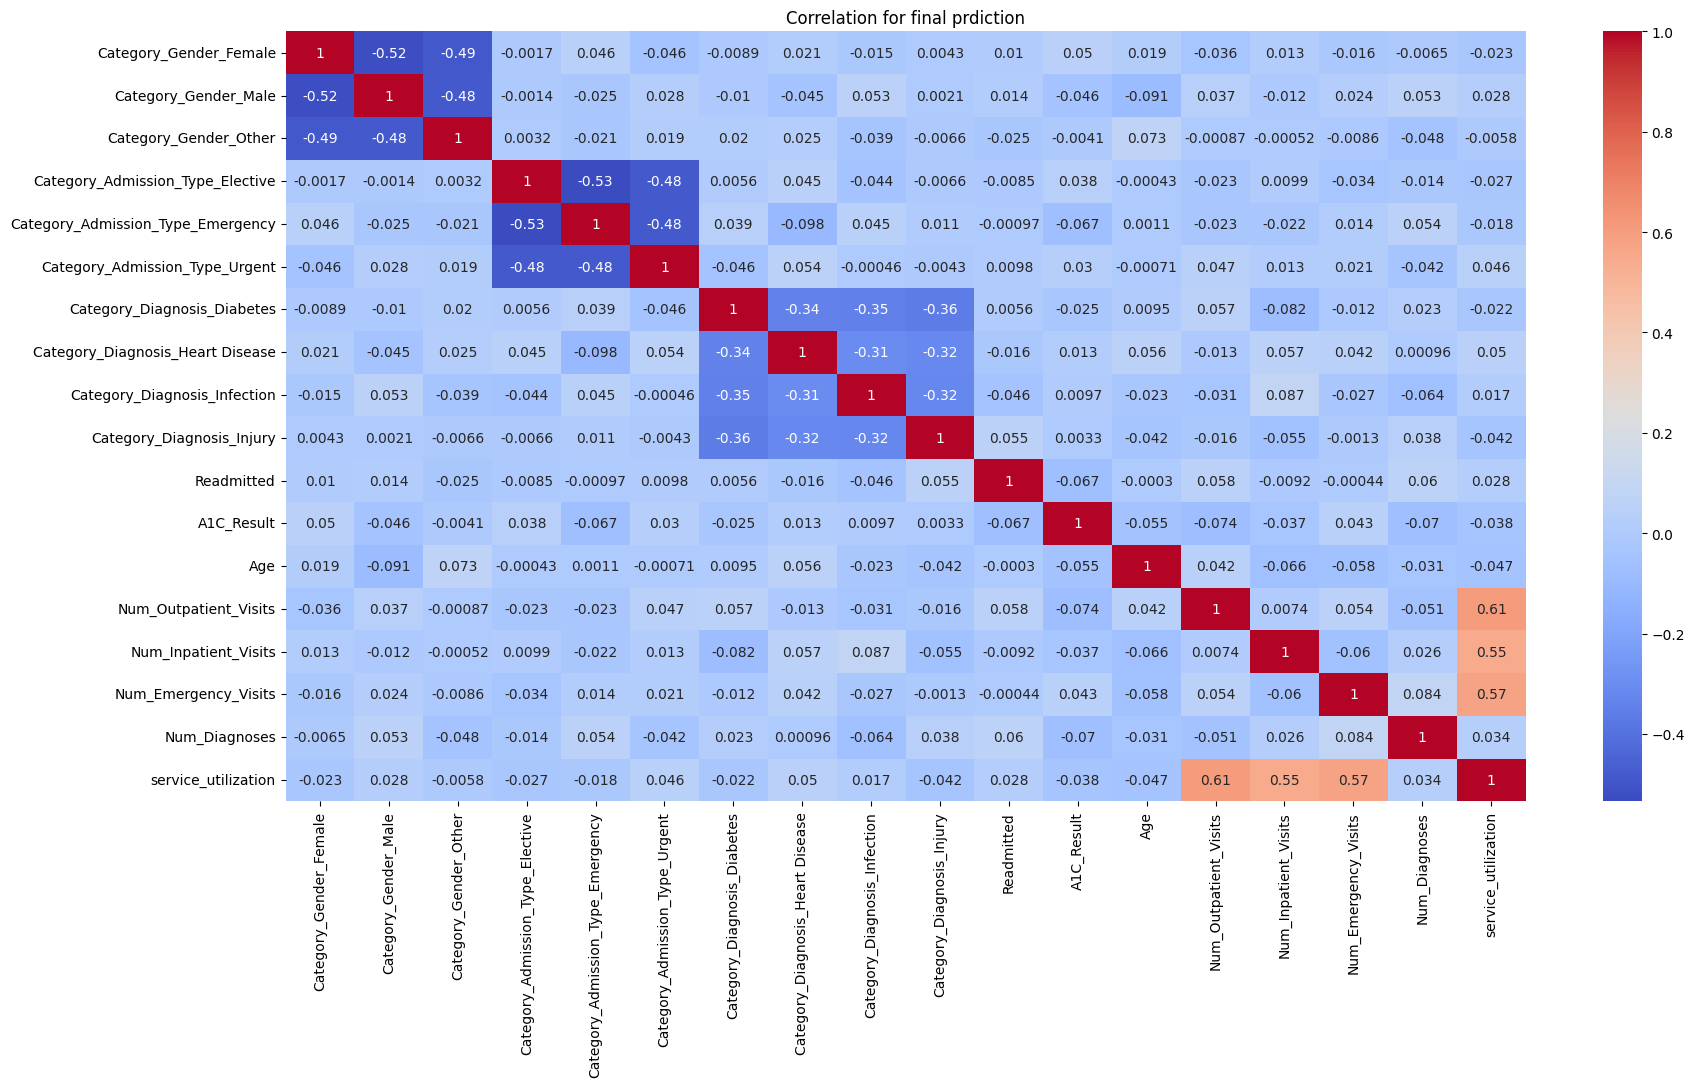

In [95]:
# Assuming 'Complete data' is your DataFrame
correlationD = Entire_Data.corr()

# Create a figure with a specific size
plt.figure(figsize=(20,10))

# Create a heatmap
sns.heatmap(correlationD, cmap='coolwarm', annot=True)

# Set the title
plt.title('Correlation for final prdiction')

# Show the plot
plt.show()

In [120]:
# import
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_curve, confusion_matrix, classification_report

from imblearn.combine import SMOTETomek

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier




In [121]:
Complete_data.columns

Index(['Category_Gender_Female', 'Category_Gender_Male',
       'Category_Gender_Other', 'Category_Admission_Type_Elective',
       'Category_Admission_Type_Emergency', 'Category_Admission_Type_Urgent',
       'Category_Diagnosis_Diabetes', 'Category_Diagnosis_Heart Disease',
       'Category_Diagnosis_Infection', 'Category_Diagnosis_Injury',
       'Readmitted', 'A1C_Result', 'Age', 'Num_Lab_Procedures',
       'Num_Medications', 'Num_Outpatient_Visits', 'Num_Inpatient_Visits',
       'Num_Emergency_Visits', 'Num_Diagnoses', 'service_utilization'],
      dtype='object')

In [122]:
Complete_data["Readmitted"].value_counts()

Readmitted
0    281
1    276
Name: count, dtype: int64

In [123]:
# Data Splitting

x_new = Complete_data.drop(columns=["Readmitted"],axis=1) #independent variables.
y_new = Complete_data["Readmitted"] #dependent variable

In [124]:
# Logistic Regression

# splitting train & test 
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size= 0.2, random_state=40)

model = LogisticRegression(solver='liblinear').fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

#checking the accuracy_score
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

metrics ={"Algorithm": "Logistic Regression",
           "Accuracy_Train": accuracy_train,
           "Accuracy_Test": accuracy_test}
print(metrics)

{'Algorithm': 'Logistic Regression', 'Accuracy_Train': 0.5910112359550562, 'Accuracy_Test': 0.5089285714285714}


In [125]:
# SVM Classification

# splitting train & test 
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size= 0.2, random_state=40)

svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
model = svm.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

#checking the accuracy_score
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

metrics ={"Algorithm": "SVM",
           "Accuracy_Train": accuracy_train,
           "Accuracy_Test": accuracy_test}
print(metrics)

{'Algorithm': 'SVM', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.4732142857142857}


In [126]:
# Other classification algorithms

def accuracy_checking(x_data, y_data, algorithm):
    
    # splitting train & test
    x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, test_size= 0.2, random_state=40)

    model = algorithm().fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    #checking the accuracy_score
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    metrics = {"Algorithm": algorithm.__name__,
               "Accuracy_Train": accuracy_train,
               "Accuracy_Test": accuracy_test}
    return metrics

In [128]:
print(accuracy_checking(x_new,y_new,DecisionTreeClassifier))
print(accuracy_checking(x_new,y_new,RandomForestClassifier))
print(accuracy_checking(x_new,y_new,ExtraTreesClassifier))
print(accuracy_checking(x_new,y_new,AdaBoostClassifier))
print(accuracy_checking(x_new,y_new,GradientBoostingClassifier))


{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.5357142857142857}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.49107142857142855}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.5}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.647191011235955, 'Accuracy_Test': 0.5357142857142857}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.9325842696629213, 'Accuracy_Test': 0.5892857142857143}


# Cross Validation

In [127]:
# StratifiedKFold Cross Validation
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Instantiate the classification model
A1C_Model = GradientBoostingClassifier()

# Instantiate Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Stratified K-Fold Cross-Validation and calculate accuracy for each fold
accuracy_scores = cross_val_score(model, x_new, y_new, scoring='accuracy', cv=skf)
mean_accuracy = np.mean(accuracy_scores)

# Print
print("Accuracy scores for each fold:", accuracy_scores)
print("Mean Accuracy:", mean_accuracy)

Accuracy scores for each fold: [0.50892857 0.5        0.5045045  0.5045045  0.5045045 ]
Mean Accuracy: 0.5044884169884171


In [128]:
# Selected Model
x_train, x_test, y_train, y_test= train_test_split(x_new, y_new, test_size= 0.2, random_state= 50)

Readmission_Model = GradientBoostingClassifier().fit(x_train, y_train)
 
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [129]:
# accuracy_score for train and test

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy score for Train and Test")
print("----------------------------------")
print("Accuracy_Train: ",accuracy_train)
print("Accuracy_Test: ",accuracy_test)

Accuracy score for Train and Test
----------------------------------
Accuracy_Train:  0.903370786516854
Accuracy_Test:  0.8571428571428571


In [130]:
# confution matrics 

print("Confution_matrix for Test")
print("--------------------------")
print(confusion_matrix(y_true = y_test, y_pred = y_pred_test))

Confution_matrix for Test
--------------------------
[[53  0]
 [16 43]]


In [131]:
# classification report typically includes metrics such as precision, recall, F1-score, and support

print("Classification_report for Test")
print("-------------------------------")
print(classification_report(y_true= y_test, y_pred= y_pred_test))

Classification_report for Test
-------------------------------
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        53
           1       1.00      0.73      0.84        59

    accuracy                           0.86       112
   macro avg       0.88      0.86      0.86       112
weighted avg       0.89      0.86      0.86       112

